In [2]:
h=0.5
f=[sin(x_).n() for x_ in srange(0,pi,h) ]  
xdata=[x_ for x_ in srange(0,pi,h) ]  
len(xdata)

7

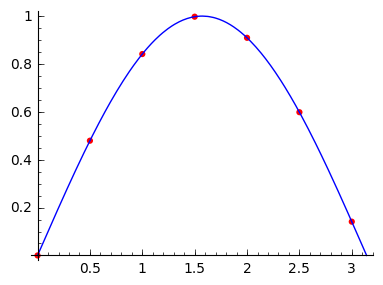

In [3]:
plt_data = point(zip(xdata,f),figsize=4,color='red',size=20)+\
 plot(sin(x),(x,0,pi))
plt_data

## Różnica  dzielona w przód
<p>Rozwińmy funkcję $f(x)$ w otoczeniu $h$ punktu $x$ w szereg Taylora:</p>
<p>$$ f(x+h) = f(x)+ f'(x)h +O(h^2)$$</p>
<p>Dzieląc przez $h$ otrzymujemy:</p>
<p>$$ \displaystyle \frac{f(x+h)-f(x) }{h}=f'(x) + O(h)$$</p>

In [5]:
df=[]
for i in range(len(xdata)-1):
    df.append( (f[i+1]-f[i])/(xdata[i+1]-xdata[i])   )

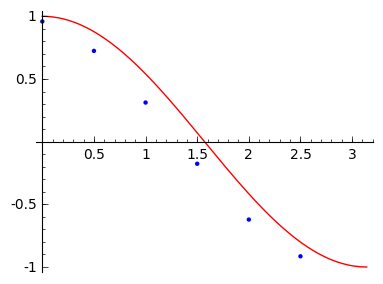

In [6]:
point(zip(xdata[:-1],df),figsize=4)+plot(cos(x),(x,0,pi),color='red' )

## Różnica dzielona w tył

In [7]:
df=[]
for i in range(1,len(xdata)):
    df.append( (f[i]-f[i-1])/(xdata[i]-xdata[i-1])   )

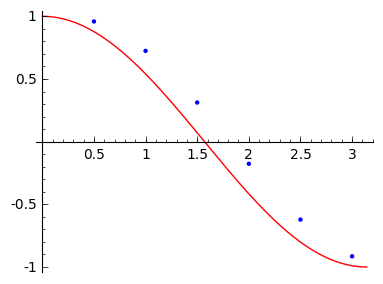

In [8]:
point(zip(xdata[1:],df),figsize=4)+plot(cos(x),(x,0,pi),color='red' )

## Różnica centralna

$$ \frac{f(x+h)-f(x-h)}{2 h}=f(x) + O(h^2) $$

In [9]:
df=[]
for i in range(1,len(xdata)-1):
    df.append( (f[i+1]-f[i-1])/(xdata[i+1]-xdata[i-1])   )

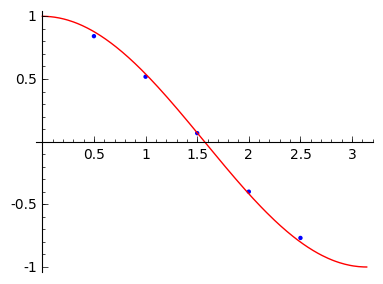

In [10]:
point(zip(xdata[1:-1],df),figsize=4)+plot(cos(x),(x,0,pi),color='red' )

<h2>Wykorzystanie interpolacji Lagrange'a</h2>
<p>Niech $w_n(x)$ będzie wielomianem interpolującym funkcję $f(x)$ w $n+1$ równoodległych punktach na odcinku $[a,b]$. Zachodzi:</p>
<p>$$f'(x)-w'_n(x)=O(h^n).$$</p>

In [82]:
n=3
i=3
pts=zip(xdata[i:i+n],f[i:i+n])
R = PolynomialRing(QQ, 'X')    ### X - bedzie generatorem wielomianów nad ciałem liczb wymiernych, 
                               ### R - będzie objektem reprezentującym to ciało
L = R.lagrange_polynomial(pts) ### interpolacja Lagrange'a jest zaimplementowana w R 
show(L(X=x).expand() )

-1063405174107613525780780/2540696264208004954545459*x^2 + 3485299600329090285561979/2540696264208004954545459*x - 94657412893541116714999/846898754736001651515153

In [83]:
n=5
pltdf=[]
pltf=[]
R = PolynomialRing(QQ, 'X')  # R - będzie objektem reprezentującym to ciało,
                             # X - bedzie generatorem wielomianów nad ciałem liczb wymiernych, 
for i in range(0,len(xdata)-n,n-1):
    pts=zip(xdata[i:i+n],f[i:i+n])
    L = R.lagrange_polynomial(pts) ### interpolacja Lagrange'a jest zaimplementowana w R 
    pltdf.append( plot( L(X=x).diff(), (x,xdata[i],xdata[i+n-1]) )  ) 
    pltf.append( plot( L(X=x), (x,xdata[i],xdata[i+n-1]),thickness=3 )  )

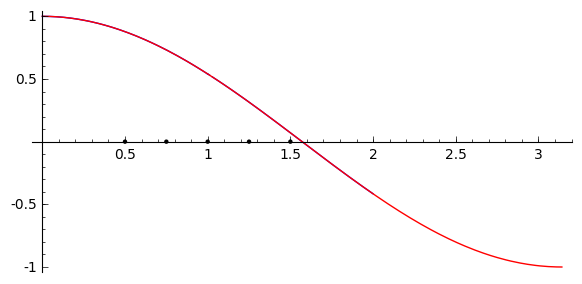

In [84]:
i=2
sum(pltdf)+plot(cos(x),(x,0,pi),color='red',figsize=(6,3))+ point( zip(xdata[i:i+n],[0]*n),color='black')

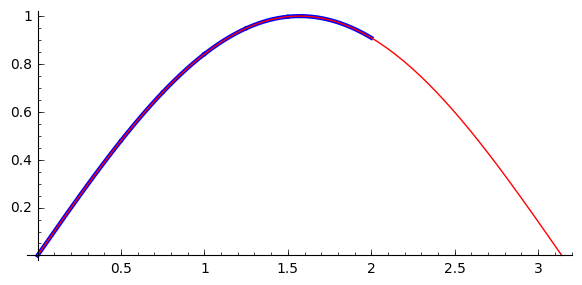

In [85]:
i=2
sum(pltf)+plot(sin(x),(x,0,pi),color='red',figsize=(6,3))+ point( zip(xdata[i:i+n],f[i:i+n]),color='black')

In [86]:
L(X=x).expand()

26627351784121832695421131352802031360/647373258075971706933020144725444239351*x^4 - 23896832662445905191073729081285721632/92481894010853100990431449246492034193*x^3 + 10059875116794262720278642490590970064/92481894010853100990431449246492034193*x^2 + 9017704044747716226705638806270696066/9662287433969726969149554398887227453*x + 513856811848909301398810421906757532/30827298003617700330143816415497344731

<h2>Analiza błędu:</h2>

In [87]:
def roznica_centralna(n=10):
    xdata=[(i/(n-1)*pi).n() for i in range(n)]
    f=[sin(x) for x in xdata]
    df=[]
    blad=[]
    for i in range(1,len(xdata)-1):
        df.append( (f[i+1]-f[i-1])/(xdata[i+1]-xdata[i-1])   )
        blad.append ( ( df[-1]-cos(xdata[i]) )^2 )
    return sqrt( sum(blad)/n )
def roznica_w_przod(n=10):
    xdata=[(i/(n-1)*pi).n() for i in range(n)]
    f=[sin(x) for x in xdata]
    df=[]
    blad=[]
    for i in range(0,len(xdata)-1):
        df.append( (f[i+1]-f[i])/(xdata[i+1]-xdata[i])   )
        blad.append ( ( df[-1]-cos(xdata[i]) )^2 )
    return sqrt( sum(blad)/n )

<p>$$\delta(n)=C h^\alpha=C_2( \frac{1}{n})^\alpha$$</p>
<p>$$\log ( \delta(n) ) =\log(C_2)+\log( \frac{1}{n})^\alpha=C_3+  \alpha\log(\frac{1}{n}) = C_3- \alpha \log(n)$$</p>

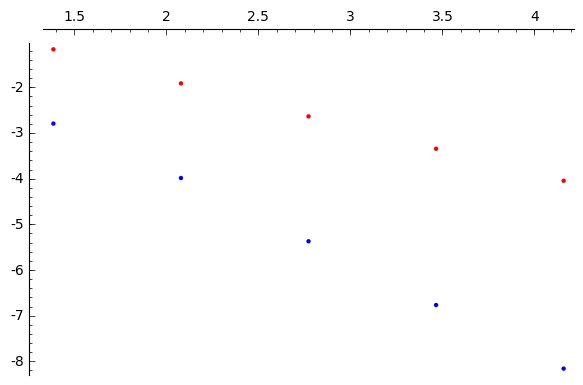

In [88]:
point ( [(log(2^n),log( roznica_centralna(2^n) ) ) for n in [2,3,4,5,6]]) +point ( [(log(2^n),log( roznica_w_przod(2^n) ) ) for n in [2,3,4,5,6]],color='red',figsize=(6,4))

In [89]:
var('a,b')
(a, b)
model(x) = a*x+b
dane=[(log(2^n),log( roznica_w_przod(2^n) ) ) for n in [5,6,7,8]]
print find_fit(dane,model)
dane=[(log(2^n),log( roznica_centralna(2^n) ) ) for n in [5,6,7,8]]
print find_fit(dane,model)

[a == -1.0064646417219156, b == 0.1414481499430356]
[a == -2.0056385038410323, b == 0.18324458332480514]


In [90]:
model(x) = x^a*b
dane=[(2^n, roznica_w_przod(2^n) ) for n in [5,6,7,8]]
print find_fit(dane,model)
dane=[((2^n),( roznica_centralna(2^n) ) ) for n in [5,6,7,8]]
print find_fit(dane,model)

[a == -1.0089260473527863, b == 1.1633731094291666]
[a == -2.0087250900932276, b == 1.2154547221166254]
